# Лабараторная работа 1. Траектория движения тела
Вычислительная практика 2. ММФ. 5 группа
Бельская Екатерина. март 2020

# Постановка задачи

Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и на высоте $h_{end}$. Движение тела осуществляется под действием силы тяжести $$\mathbf{F}=m(0,-g),$$ где *m* — масса тела, *g* — ускорение свободного падения. Сопротивление среды пренебрегаем.
Дано $h_{start}$ = 10 m, $T$ = 2.5 s, $s_{end}$ = 55 m, $h_{end}$ = 12 m, $\approx$ 9.807 m/s$^2$. Найдите угол запуска тела $\alpha$.
Обозначим через $s_x(t)$ и $s_y(t)$ горизонтальное и вертикальное положение тела в момент времени *t*, соответственно. Постройте траекторию движения тела $(s_x(t),s_y(t))$ для $ t \in [0,T]$, где начальный момент времени движения полагается равным нулю.

## Реализация

### Этап 1. Подключение библиотек и модулей

Подключем модуль **math** с математическими функциями.


In [1]:
import math as mth 

Для обращения к содержимому модуля используется синтакстис с "точкой": <имя объекта модуля>.<имя функции>

In [2]:
mth.sin(mth.pi/2)

1.0

Подключим библиотеку **numpy** для работы со структурой данных массив (**ndarray**). Тип последовательности массив не является встроенным типом данных Python, а определен базовым типом данных библиотеки numpy.

In [3]:
import numpy as np

Подключим модуль **pyplot** библиотеки **matplotlib** для работы с графикой

In [4]:
import matplotlib.pyplot as plt

In [5]:
# необходимо для визуализации графиков внутри Jupyter Nootbook 
%matplotlib inline
# необходимо для создания интерактивных графиков
%matplotlib notebook

### Этап 2. Определение переменных

Интрукция присваивания (=) создает ссылку на объект: <ссылка> = <объект>. Переменные создаются при первом присваивании. Объявлять переменные не нужно. Нельзя использовать переменную, которой не присвоено значение.


In [6]:
h_start = 10 # высота положения тела в момент запуска

In [7]:
T = 2.5 # время полета
s_end = 5.5e1 # горизонтальное перемещение тела за время полета
h_end = 1.2E+1 # высота положения тела в конечный момент движения
g = 9.807 # ускорение свободного падения
h_start,T,s_end,h_end,g

(10, 2.5, 55.0, 12.0, 9.807)

Если в записи числа обнаруживается точка или экспонента, то интерпретатор Python создает объект типа вещественное число и использует вещественные (не целочисленные) вычисления, когда такой объект участвует в выражении.

Проверка типов

In [8]:
type(h_start), type(h_end) 

(int, float)

С помощью функции **arange** библиотеки numpy создадим массив равномерно распределенных чисел на отрезке $[0,𝑇]$ с шагом 0.01

In [9]:
t = [i/100 for i in range(int(T*100))]

In [10]:
type(t)

list

**Важно**: после создания массива его размер изменить нельзя!

### Этап 3. Построение функции перемещения

Помещаем начало прямоугольной декартовой системы координат в начальный момент движения на уровне земли, тогда $s_x(0)=0$,$s_y(0)=h_{start}$.

Для построения функции перемещения $(s_x(t),s_y(t))$ воспользуемся вторым законом Ньютона $$ m \mathbf{a}=\mathbf{F},$$ где ускорение движения тела $ \mathbf{a}=(s''_x(t),s''_y(t))$ и приложенная сила $\mathbf{F}= m(0,-g)$.

Из второго закона Ньютона имеем $$s_x(t)=s_x(0)+v0_xt=0+v0_xt,$$
$$s_y(t)=s_y(0)+v0_yt-\frac{g}{2}t^2=h_{start}+v0_yt-\frac{g}{2}t^2,$$
где **v0**=$(v0_x,v0_y)$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0$.

Функция перемещения имеет такой вид потому что на тело действуют два параментра(силы). Первая параметр это погоризонтали те по $O_x$. Тело брошено и этот параметр можно выписать как обычное прямолинейное движение в виде линейного уравнения. Второй параметр это вертикальный. Тело падает вниз и на него действует притяжение земли. Оно падает с ускорением. Движение с ускорением представляется в виде квадратичной функции.

Из заданного соотношения $s_x(T)=s_{end}$ находим значение для $v0_x$.

In [11]:
v0_x = s_end/T; v0_x

22.0

Из заданного соотношения $s_y(T)=h_{end}$ находим значение для $v0_y$.

In [12]:
v0_y = (h_end-h_start+g/2*T**2)/T; v0_y

13.05875

Значение угла $\alpha$ определяем из соотношения $tan\alpha=\frac{v0_y}{v0_x}$.

In [13]:
alpha = mth.atan(v0_y/v0_x)
(alpha,mth.degrees(alpha))

(0.53568520293127, 30.692501275570805)

### Этап 4. График траектории движения

Построение графиков функций осуществляется по координатам точек графика. Для этого можно создать массив значений $x$-координат точек графика функции и массив соответствующих значений $y$-координат точек графика функции.

На Этапе 2 создан массив чисел со значениями переменной времени.

In [14]:
t;

Определим массивы чисел, соответствующие горизонтальному и вертикальному положению тела в момент времени $t$.

In [15]:
s_x = [v0_x*i for i in t]
s_y =[h_start + v0_y*i - g*i**2/2 for i in t]

Строим график параметрически заданной функции $(s_x(t),s_y(t))$ средствами модуля **pyplot** библиотеки **matplotlib**

In [16]:
fig = plt.figure();
plt.plot(s_x,s_y,'b-',color='green',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([0, s_end, 0, h_end+10]);

<IPython.core.display.Javascript object>

# Построение графиков заданных функций

## Пример

In [17]:
fig = plt.figure();
ax = plt.axes(projection='polar'); 
phi = np.arange(-np.pi/2, np.pi/2, 0.1)
r = phi
plt.plot(phi + (r<0)*np.pi,abs(r),'r.')

<IPython.core.display.Javascript object>

## Вариант 2

a) *Роза* $\rho = a\sin{(\frac{m}{n}\phi)}$, $a\in\mathbb{R}$, *m*, *n* -- натуральные нечётные, $m \neq n$ 

In [18]:
a, m, n = 1, 6, 1

In [19]:
fig = plt.figure();
ax = plt.axes(projection='polar'); 
phi = np.arange(0, (2*np.pi), 0.01)
r = phi
plt.plot(r, a*np.sin(m/n*r))

<IPython.core.display.Javascript object>

б) $ x= \sqrt{1-t^2}$, $ y=\tan{\sqrt{1+t}}$

In [20]:
fig = plt.figure();
ax = plt.axes();
t = np.arange(-1, 1, 0.01)
x_t = (1-t**2)**0.5
y_t = np.tan((1+t)**0.5)
plt.plot(x_t,y_t,'b-',color='pink',lw=5)
plt.title('График')

plt.xlabel('x (t)'); plt.ylabel('y (t)')

plt.axis([-0.5, 1.2, 0, 6]);

<IPython.core.display.Javascript object>

## Задание 2. Реализация

Введём переменные для координат начальной и конечной точки движения в виде массивов. Представление координат точек в виде массивов иногда эффективнеее, чем представление в виде списков, для дальнейшей работы с координатами.

In [21]:
p_start = np.array([s_x[0], s_y[0]])

In [22]:
p_end = np.array([s_x[-1], s_y[-1]])

Воспользуемся векторно-параметрическим уравнением прямой для заданной точки $p_{start}$, лежащей на прямой, и заданного направляющего вектора $a$ $$p(t)=p_{start}+at$$. 

Направляющий вектор можно определить как $a=p_{end}-p_{start}$.

In [23]:
a = p_end - p_start # направляющий вектор

In [24]:
p = [p_start + a*t for t in [-2, 2]] # создание списка из 2-х точек
p = np.array(p)
p

array([[-109.56     ,    5.7718057],
       [ 109.56     ,   14.2281943]])

Построим графики 2-х функций в одной графической области.

In [25]:
fig = plt.figure();
plt.plot(s_x,s_y,'b-',color='green',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='blue',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end+5, 0, h_end+10]);

<IPython.core.display.Javascript object>

Для построения касательной прямой воспульзуемся уравнением прямой по точке $p_0(x_0,y_0)$ и угловому коэфиициенту $k$ $$y=k(x-x_0)+y_0$$

In [ ]:
Для вычисления $k$ воспользуемся формулой вычисления производной функций, заданных параметрически. С этой целью подключим **SymPy** -- библиотеку, для символьных вычислений в Python. 

In [26]:
from sympy import *

Напишем функцию, возращающую координаты точки и значение коэффициента в заданный момент времени.

In [33]:
def findPoint(t): 
    s_x = v0_x*t 
    s_y =h_start + v0_y*t - g*t**2/2
    p_1 = np.array([s_x, s_y])  # координаты точки
    t1 = Symbol('t1')
    # вычисление производных и подстановка t
    k_der_1 = diff(v0_x*t1, t1, 1) 
    k_der_2 = diff((h_start + v0_y*t1 - g*t1**2/2), t1, 1).subs(t1, t)
    k = k_der_2/k_der_1
    return (p_1, k)

In [34]:
p_1 = findPoint(0)[0] 
k = findPoint(0)[1]
p_1, k

(array([ 0., 10.]), 0.593579545454545)

Найдём 2 точки, через которые проходит касательная.

In [35]:
y_c = [(k*(i-p_1[0]) + p_1[1]) for i in [-10,60]]
x_c = [-10,60]


([-10, 60], [4.06420454545454, 45.6147727272727])

<IPython.core.display.Javascript object>


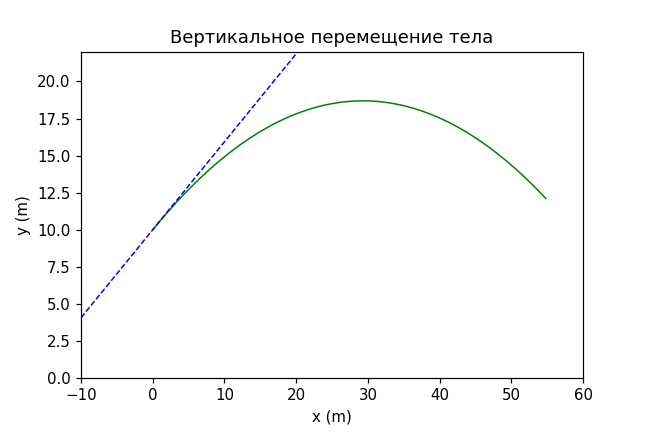

In [36]:
fig = plt.figure();
plt.plot(s_x,s_y,'b-',color='green',lw=1)
plt.plot(x_c,y_c,'--',color='blue',lw=1)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-10, s_end+5, 0, h_end+10]);

## Задание 3. (определение времени касания земли)

Для задачи о падении тела определим время касания телом земли (время нахождения тела в воздухе).

### Реализация 1-ый способ(точное решение)

Время находится путём решения квадратного уравнения $s_y(t)=0$.

In [ ]:
#s_y =h_start + v0_y*t - g*t**2/2 

Нахождение дискриминанта

In [ ]:
D = v0_y**2 + 2*h_start*g; D

In [ ]:
t_s = (v0_y + D**(1/2))/g; t_s

### Реализация 2-ой способ(приближённое решение)

Пусть $T=t_{stop}=100$. Найдём последовательности $t$ и $s_y$, выражающие соответственно моменты времени и значение высоты в данные моменты.

In [ ]:
T = 100
t = [i/100 for i in range(int(T*100))]
s_y =[h_start + v0_y*i - g*i**2/2 for i in t]

Пусть $el$ -- список, хранящий 2 значения из последовательности $s_y$ два соседних элемента, значения которых меняют знак, и соответствующие значения $t$.

In [ ]:
el = []
for k in range(len(s_y)-1):
    if s_y[k]*s_y[k+1] < 0:
        el.append((t[k], s_y[k]))
        el.append((t[k+1], s_y[k+1]))
        break
el

In [ ]:
# x-x0/x1-x0=y-y0/y1-y0 - уравнение прямой по 2-м точкам
#t*=x=x0-y0*(x1-x0)/(y1-y0)

In [ ]:
x0, x1 = el[0][0], el[1][0]
y0, y1 = el[0][1], el[1][1]

In [ ]:
t_s1 = x0 - y0*(x1 - x0)/(y1 - y0); t_s1

In [ ]:
t_s # точное решение

In [ ]:
t_s1 # приближённое решение

In [ ]:
t_s - t_s1 # погрешность